<a href="https://colab.research.google.com/github/jtneumann/MLwork/blob/master/fastai/ml1/HP1still.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -q fastai==0.7.0
!pip install -q pandas==0.23.4

    100% |████████████████████████████████| 122kB 3.9MB/s 
    100% |████████████████████████████████| 496.4MB 32kB/s 
    100% |████████████████████████████████| 1.5MB 4.1MB/s 
    100% |████████████████████████████████| 3.6MB 6.1MB/s 
    100% |████████████████████████████████| 12.4MB 2.6MB/s 
    100% |████████████████████████████████| 61kB 18.9MB/s 
    100% |████████████████████████████████| 81kB 24.5MB/s 
mizani 0.5.4 has requirement pandas>=0.23.4, but you'll have pandas 0.22.0 which is incompatible.
plotnine 0.5.1 has requirement pandas>=0.23.4, but you'll have pandas 0.22.0 which is incompatible.
    100% |████████████████████████████████| 8.9MB 4.7MB/s 


In [0]:

%matplotlib inline

from fastai.imports import *
from fastai.structured import *
from pandas_summary import DataFrameSummary
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from IPython.display import display
from sklearn import metrics

In [0]:
df_raw = pd.read_csv('train.csv')

In [14]:
df_raw

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,2.505338
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,2.493950
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,2.510994
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,2.472277
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,2.520050
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,2.474065
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,2.536439
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,2.501934
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,2.465938
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,2.457744


In [0]:
df_raw.SalePrice = np.log(df_raw.SalePrice)

In [0]:
train_cats(df_raw)

In [0]:
df_trn, y_trn, nas = proc_df(df_raw, 'SalePrice')

In [16]:
display(df_raw.isnull().sum().sort_index()/len(df_raw))

1stFlrSF         0.000000
2ndFlrSF         0.000000
3SsnPorch        0.000000
Alley            0.937671
BedroomAbvGr     0.000000
BldgType         0.000000
BsmtCond         0.025342
BsmtExposure     0.026027
BsmtFinSF1       0.000000
BsmtFinSF2       0.000000
BsmtFinType1     0.025342
BsmtFinType2     0.026027
BsmtFullBath     0.000000
BsmtHalfBath     0.000000
BsmtQual         0.025342
BsmtUnfSF        0.000000
CentralAir       0.000000
Condition1       0.000000
Condition2       0.000000
Electrical       0.000685
EnclosedPorch    0.000000
ExterCond        0.000000
ExterQual        0.000000
Exterior1st      0.000000
Exterior2nd      0.000000
Fence            0.807534
FireplaceQu      0.472603
Fireplaces       0.000000
Foundation       0.000000
FullBath         0.000000
                   ...   
LotShape         0.000000
LowQualFinSF     0.000000
MSSubClass       0.000000
MSZoning         0.000000
MasVnrArea       0.005479
MasVnrType       0.005479
MiscFeature      0.963014
MiscVal     

In [0]:
os.makedirs('tmp', exist_ok=True)
df_raw.to_feather('tmp/HousePrices-raw')

In [0]:
def split_vals(a,n): return a[:n], a[n:]
n_valid = 1200
n_trn = len(df_trn)-n_valid
X_train, X_valid = split_vals(df_trn, n_trn)
y_train, y_valid = split_vals(y_trn, n_trn)
raw_train, raw_valid = split_vals(df_raw, n_trn)

In [0]:
def rmse(x,y): return math.sqrt(((x-y)**2).mean())

def print_score(m):
    res = [rmse(m.predict(X_train), y_train), rmse(m.predict(X_valid), y_valid),
                m.score(X_train, y_train), m.score(X_valid, y_valid)]
    if hasattr(m, 'oob_score_'): res.append(m.oob_score_)
    print(res)

In [20]:
df_raw

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,2.505338
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,2.493950
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,2.510994
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,2.472277
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,2.520050
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,2.474065
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,2.536439
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,2.501934
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,2.465938
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,2.457744


In [0]:
set_rf_samples(500)

In [22]:
m = RandomForestRegressor(n_estimators=40, min_samples_leaf=3, max_features=0.5, n_jobs=-1, oob_score=True)
m.fit(X_train, y_train)
print_score(m)

[0.005436796354618139, 0.013246809283530508, 0.9720271858289256, 0.8422298541388703, 0.7867264768854336]


In [23]:

def get_preds(t): return t.predict(X_valid)
%time preds = np.stack(parallel_trees(m, get_preds))
np.mean(preds[:,0]), np.std(preds[:,0])

CPU times: user 28.4 ms, sys: 38.4 ms, total: 66.8 ms
Wall time: 191 ms


(2.4901266564709723, 0.01605905492863614)

In [38]:
df_trn

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,LotFrontage_na,MasVnrArea_na,GarageYrBlt_na
0,1,60,4,65.0,8450,2,0,4,4,1,...,0,0,0,2,2008,9,5,False,False,False
1,2,20,4,80.0,9600,2,0,4,4,1,...,0,0,0,5,2007,9,5,False,False,False
2,3,60,4,68.0,11250,2,0,1,4,1,...,0,0,0,9,2008,9,5,False,False,False
3,4,70,4,60.0,9550,2,0,1,4,1,...,0,0,0,2,2006,9,1,False,False,False
4,5,60,4,84.0,14260,2,0,1,4,1,...,0,0,0,12,2008,9,5,False,False,False
5,6,50,4,85.0,14115,2,0,1,4,1,...,3,3,700,10,2009,9,5,False,False,False
6,7,20,4,75.0,10084,2,0,4,4,1,...,0,0,0,8,2007,9,5,False,False,False
7,8,60,4,69.0,10382,2,0,1,4,1,...,0,3,350,11,2009,9,5,True,False,False
8,9,50,5,51.0,6120,2,0,4,4,1,...,0,0,0,4,2008,9,1,False,False,False
9,10,190,4,50.0,7420,2,0,4,4,1,...,0,0,0,1,2008,9,5,False,False,False


In [24]:

fi = rf_feat_importance(m, df_trn); fi[:10]

,cols,imp
17,OverallQual,0.260793
46,GrLivArea,0.203120
19,YearBuilt,0.080202
38,TotalBsmtSF,0.059781
62,GarageArea,0.053814
4,LotArea,0.027486
49,FullBath,0.023835
61,GarageCars,0.022935
20,YearRemodAdd,0.020482
53,KitchenQual,0.018717


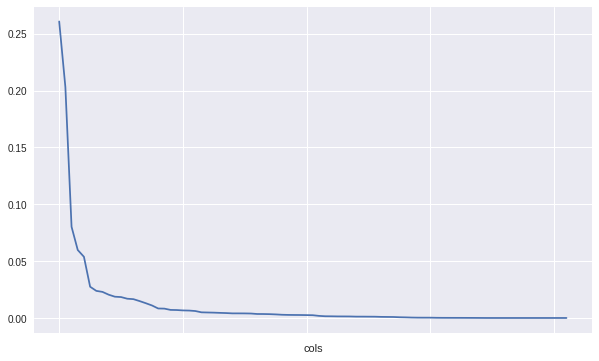

In [25]:
fi.plot('cols', 'imp', figsize=(10,6), legend=False);

In [0]:
def plot_fi(fi): return fi.plot('cols', 'imp', 'barh', figsize=(12,7), legend=False)

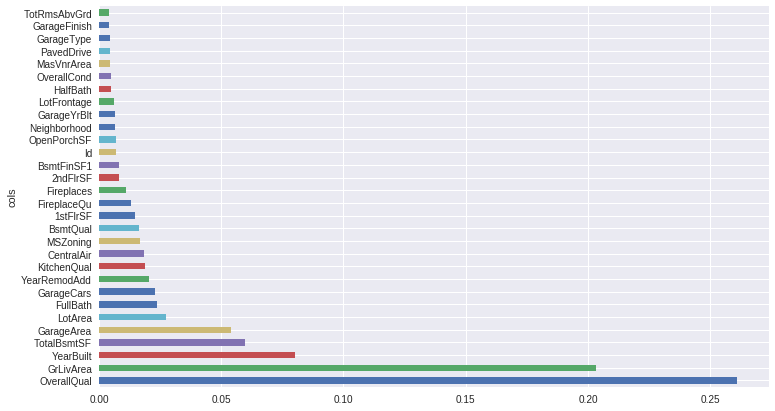

In [27]:
plot_fi(fi[:30]);

In [28]:
to_keep = fi[fi.imp>0.02].cols; len(to_keep)

9

In [0]:
df_keep = df_trn[to_keep].copy()
X_train, X_valid = split_vals(df_keep, n_trn)

In [30]:
m = RandomForestRegressor(n_estimators=40, min_samples_leaf=3, max_features=0.5,
                          n_jobs=-1, oob_score=True)
m.fit(X_train, y_train)
print_score(m)

[0.006668215082084107, 0.014241542476242104, 0.9579206301809262, 0.8176455698618482, 0.7601079862070275]


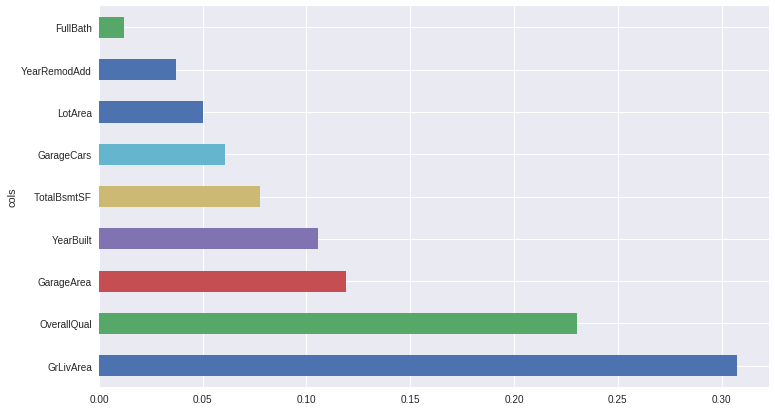

In [31]:
fi = rf_feat_importance(m, df_keep)
plot_fi(fi);

In [32]:
df_trn2, y_trn, nas = proc_df(df_raw, 'SalePrice', max_n_cat=7)
X_train, X_valid = split_vals(df_trn2, n_trn)

m = RandomForestRegressor(n_estimators=40, min_samples_leaf=3, max_features=0.6, n_jobs=-1, oob_score=True)
m.fit(X_train, y_train)
print_score(m)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


[0.005593684588467995, 0.013646096981216908, 0.9703894839363238, 0.8325754399408097, -21.72844778216003]


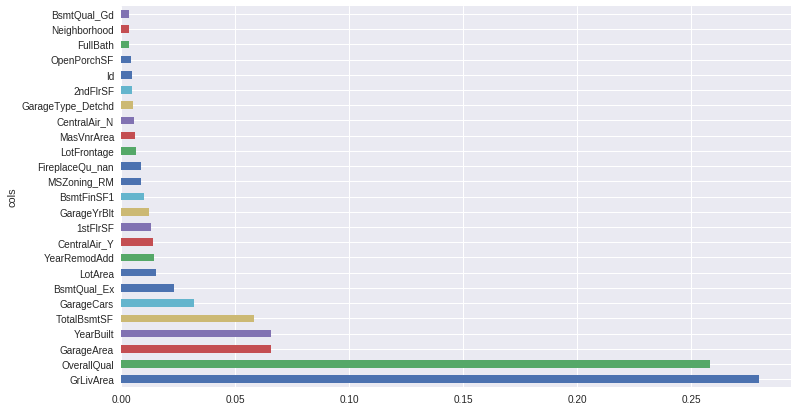

In [33]:
fi = rf_feat_importance(m, df_trn2)
plot_fi(fi[:25]);

In [0]:
from scipy.cluster import hierarchy as hc

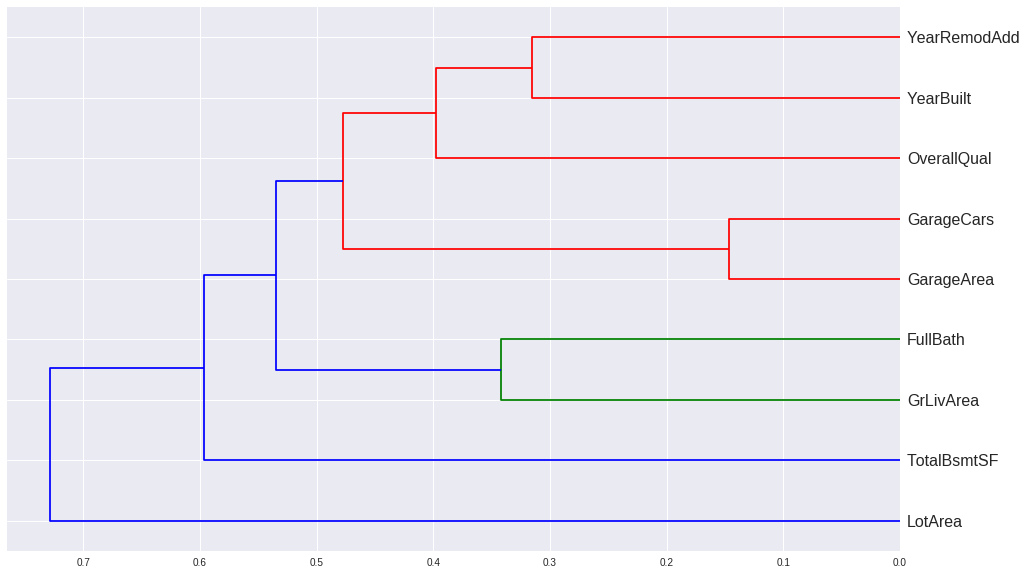

In [35]:
corr = np.round(scipy.stats.spearmanr(df_keep).correlation, 4)
corr_condensed = hc.distance.squareform(1-corr)
z = hc.linkage(corr_condensed, method='average')
fig = plt.figure(figsize=(16,10))
dendrogram = hc.dendrogram(z, labels=df_keep.columns, orientation='left', leaf_font_size=16)
plt.show()

In [0]:

def get_oob(df):
    m = RandomForestRegressor(n_estimators=30, min_samples_leaf=5, max_features=0.6, n_jobs=-1, oob_score=True)
    x, _ = split_vals(df, n_trn)
    m.fit(x, y_train)
    return m.oob_score_

In [37]:
get_oob(df_keep)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


-22.97313771376624

In [0]:
df_ext = df_keep.copy()
df_ext['is_valid'] = 1
df_ext.is_valid[:n_trn] = 0
x, y, nas = proc_df(df_ext, 'is_valid')

In [40]:
m = RandomForestClassifier(n_estimators=40, min_samples_leaf=3, max_features=0.5, n_jobs=-1, oob_score=True)
m.fit(x, y);
m.oob_score_

0.8212328767123288

In [41]:
fi = rf_feat_importance(m, x); fi[:10]

,cols,imp
3,TotalBsmtSF,0.182506
1,GrLivArea,0.177957
5,LotArea,0.175966
4,GarageArea,0.152204
2,YearBuilt,0.128586
8,YearRemodAdd,0.119904
0,OverallQual,0.038328
7,GarageCars,0.013332
6,FullBath,0.011217


In [42]:
df_trn

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,LotFrontage_na,MasVnrArea_na,GarageYrBlt_na
0,1,60,4,65.0,8450,2,0,4,4,1,...,0,0,0,2,2008,9,5,False,False,False
1,2,20,4,80.0,9600,2,0,4,4,1,...,0,0,0,5,2007,9,5,False,False,False
2,3,60,4,68.0,11250,2,0,1,4,1,...,0,0,0,9,2008,9,5,False,False,False
3,4,70,4,60.0,9550,2,0,1,4,1,...,0,0,0,2,2006,9,1,False,False,False
4,5,60,4,84.0,14260,2,0,1,4,1,...,0,0,0,12,2008,9,5,False,False,False
5,6,50,4,85.0,14115,2,0,1,4,1,...,3,3,700,10,2009,9,5,False,False,False
6,7,20,4,75.0,10084,2,0,4,4,1,...,0,0,0,8,2007,9,5,False,False,False
7,8,60,4,69.0,10382,2,0,1,4,1,...,0,3,350,11,2009,9,5,True,False,False
8,9,50,5,51.0,6120,2,0,4,4,1,...,0,0,0,4,2008,9,1,False,False,False
9,10,190,4,50.0,7420,2,0,4,4,1,...,0,0,0,1,2008,9,5,False,False,False


In [0]:
df_test=pd.read_csv('test.csv')

In [44]:
df_test

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
5,1466,60,RL,75.0,10000,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal
6,1467,20,RL,NaN,7980,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,GdPrv,Shed,500,3,2010,WD,Normal
7,1468,60,RL,63.0,8402,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,5,2010,WD,Normal
8,1469,20,RL,85.0,10176,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,2,2010,WD,Normal
9,1470,20,RL,70.0,8400,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,4,2010,WD,Normal


In [45]:
df_keep

,OverallQual,GrLivArea,YearBuilt,TotalBsmtSF,GarageArea,LotArea,FullBath,GarageCars,YearRemodAdd
0,7,1710,2003,856,548,8450,2,2,2003
1,6,1262,1976,1262,460,9600,2,2,1976
2,7,1786,2001,920,608,11250,2,2,2002
3,7,1717,1915,756,642,9550,1,3,1970
4,8,2198,2000,1145,836,14260,2,3,2000
5,5,1362,1993,796,480,14115,1,2,1995
6,8,1694,2004,1686,636,10084,2,2,2005
7,7,2090,1973,1107,484,10382,2,2,1973
8,7,1774,1931,952,468,6120,2,2,1950
9,5,1077,1939,991,205,7420,1,1,1950


In [46]:
df_keep.head()

,OverallQual,GrLivArea,YearBuilt,TotalBsmtSF,GarageArea,LotArea,FullBath,GarageCars,YearRemodAdd
0,7,1710,2003,856,548,8450,2,2,2003
1,6,1262,1976,1262,460,9600,2,2,1976
2,7,1786,2001,920,608,11250,2,2,2002
3,7,1717,1915,756,642,9550,1,3,1970
4,8,2198,2000,1145,836,14260,2,3,2000


In [0]:
final = df_test[['OverallQual','GrLivArea','YearBuilt','TotalBsmtSF','GarageArea','LotArea','FullBath','GarageCars','YearRemodAdd']] 

In [49]:
final


,OverallQual,GrLivArea,YearBuilt,TotalBsmtSF,GarageArea,LotArea,FullBath,GarageCars,YearRemodAdd
0,5,896,1961,882.0,730.0,11622,1,1.0,1961
1,6,1329,1958,1329.0,312.0,14267,1,1.0,1958
2,5,1629,1997,928.0,482.0,13830,2,2.0,1998
3,6,1604,1998,926.0,470.0,9978,2,2.0,1998
4,8,1280,1992,1280.0,506.0,5005,2,2.0,1992
5,6,1655,1993,763.0,440.0,10000,2,2.0,1994
6,6,1187,1992,1168.0,420.0,7980,2,2.0,2007
7,6,1465,1998,789.0,393.0,8402,2,2.0,1998
8,7,1341,1990,1300.0,506.0,10176,1,2.0,1990
9,4,882,1970,882.0,525.0,8400,1,2.0,1970


In [0]:
train_cats(final)

In [52]:
res, _, nas = proc_df(final)

/usr/local/lib/python3.6/dist-packages/fastai/structured.py:425: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df.drop(ignore_flds, axis=1, inplace=True)


In [54]:
res

,OverallQual,GrLivArea,YearBuilt,TotalBsmtSF,GarageArea,LotArea,FullBath,GarageCars,YearRemodAdd,TotalBsmtSF_na,GarageArea_na,GarageCars_na
0,5,896,1961,882.0,730.0,11622,1,1.0,1961,False,False,False
1,6,1329,1958,1329.0,312.0,14267,1,1.0,1958,False,False,False
2,5,1629,1997,928.0,482.0,13830,2,2.0,1998,False,False,False
3,6,1604,1998,926.0,470.0,9978,2,2.0,1998,False,False,False
4,8,1280,1992,1280.0,506.0,5005,2,2.0,1992,False,False,False
5,6,1655,1993,763.0,440.0,10000,2,2.0,1994,False,False,False
6,6,1187,1992,1168.0,420.0,7980,2,2.0,2007,False,False,False
7,6,1465,1998,789.0,393.0,8402,2,2.0,1998,False,False,False
8,7,1341,1990,1300.0,506.0,10176,1,2.0,1990,False,False,False
9,4,882,1970,882.0,525.0,8400,1,2.0,1970,False,False,False


In [0]:
res.drop(['TotalBsmtSF_na','GarageArea_na','GarageCars_na'],axis=1, inplace=True)

In [0]:
salesprice = m.predict(res)

In [57]:
salesprice

array([1, 1, 1, ..., 1, 1, 1])